In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df_original = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\6_UK_Job_glassdoor2024\job_list_cleaned.csv')

sns.set_style('ticks')

# Remove data that dont contain salary
df = df_original.dropna(subset='salary').copy()

# make hourly salary to yearly salary (1950 hours per year)

def make_year(salary):
    if salary<1000:    return salary*1950
    else : return salary

df['salary']=df['salary'].apply(make_year)  




## How about Data Analyst job only?
    - Required skills and salary

In [19]:
DA_list= [ 'Junior Data Analyst', 'Data Analyst',   'Senior Data Analyst' ]
df_DA= df[df['cleaned_job_title'].isin(DA_list)].copy()

In [20]:
df_DA['skill_list'] = df_DA['skills'].str.split(',')

In [21]:
df_DA_skills = df_DA.explode('skill_list')
df_DA_skills['skill_list'] = df_DA_skills['skill_list'].str.strip()

In [22]:
df_DA_skills.groupby('skill_list').size().sort_values(ascending=False).head(15)

skill_list
SQL                     62
Microsoft Excel         53
Data analysis skills    52
Power BI                50
Tableau                 30
Azure                   28
Analysis skills         27
Communication skills    25
SAS                     24
Oracle                  24
Data modelling          22
Microsoft Office        17
Data management         15
Python                  14
R                       13
dtype: int64

In [23]:
df_DA_skills_sal = df_DA_skills.groupby('skill_list').agg(
    skill_count = ('skill_list', 'size'),
    avg_salary = ('salary','mean')
).sort_values(by ='skill_count', ascending =False).head(15).sort_values(by='avg_salary',ascending=False)

In [24]:
df_DA_skills_sal['percent']= df_DA_skills_sal['skill_count'].div(len(df_DA)/100)

In [25]:
df_DA_skills_sal

,skill_count,avg_salary,percent
skill_list,,,
Oracle,24,50842.708333,8.510638
Data modelling,22,48555.681818,7.801418
SAS,24,48051.041667,8.510638
Communication skills,25,47520.000000,8.865248
Azure,28,47508.035714,9.929078
Data analysis skills,52,46735.096154,18.439716
SQL,62,46086.693548,21.985816
Python,14,45571.428571,4.964539
Analysis skills,27,45148.148148,9.574468


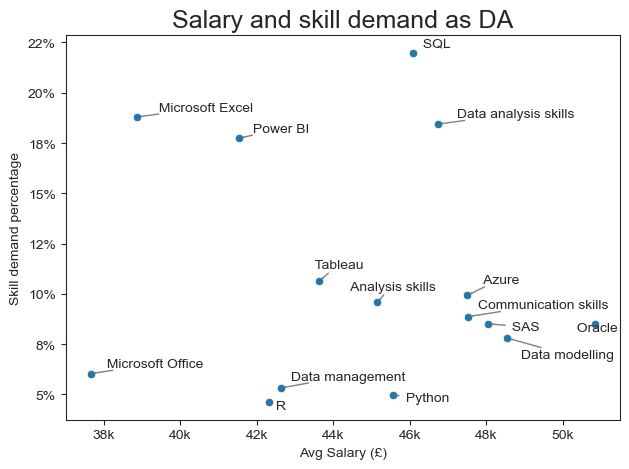

In [38]:
sns.scatterplot(data=df_DA_skills_sal,y='percent', x='avg_salary')

texts = []
for i, txt in enumerate(df_DA_skills_sal.index):
    texts.append(plt.text(df_DA_skills_sal['avg_salary'].iloc[i],df_DA_skills_sal['percent'].iloc[i],  " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), expand=(1.2,1.5))

plt.ylabel('Skill demand percentage')
plt.title('Salary and skill demand as DA',fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg Salary (£)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()


2) Salary by Industry as DA

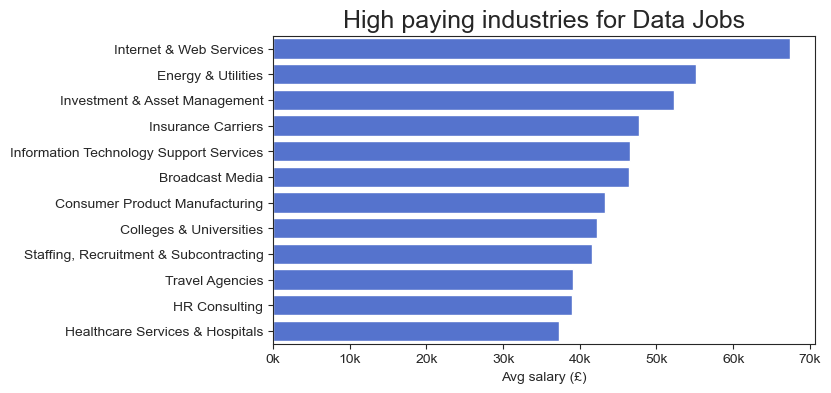

In [ ]:
df_DAind_sal = df_DA.groupby('industry').agg(
    industry_count = ('industry','count'),
    avg_salary = ('salary','mean')

).sort_values(by='industry_count',ascending=False).head(12)

plt.figure(figsize=(7, 4))
sns.barplot(data=df_DAind_sal.sort_values(by='avg_salary'), x='avg_salary', y='industry',color='royalblue')

plt.ylabel('')
plt.title("High paying industries for Data Jobs",fontsize=18)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.xlabel('Avg salary (£)')
plt.gca().invert_yaxis()
plt.show()
